In [5]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing  # gives functions for scaling data
import matplotlib.pyplot as plt

In [6]:
# open up my dataset from RNAseq experiment
df = pd.read_csv("original_cd320.koB12neg_vs_ctrlB12neg_copy.csv")
df.head()

,Gene,Source,Chr,Start,End,baseMean,log2FoldChange,log2FoldChangeUncorrected,lfcSE,stat,...,Control.Normal.B12_10,Control.Normal.B12_15,KO.B12_Deficient.B12_03,KO.B12_Deficient.B12_04,KO.B12_Deficient.B12_06,KO.B12_Deficient.B12_07,KO.Normal.B12_01,KO.Normal.B12_08,KO.Normal.B12_11,KO.Normal.B12_12
0,Tmem181a,HAVANA,chr17,6270470,6308314,14902.552866,-0.686035,-0.712041,0.017077,-40.172218,...,18346.249782,18475.883409,11224.547655,11321.244681,11175.307230,11333.126407,11434.949103,11357.689735,11390.642607,11424.623768
1,Cd320,HAVANA,chr17,33843091,33849774,176.246376,-1.195882,-6.074842,0.043120,-27.733483,...,300.828145,367.548311,1.964394,9.866868,2.164499,6.732741,4.370490,4.140986,7.076582,2.035386
2,Gm16867,HAVANA,chr14,69363504,69503362,1749.882377,-0.696872,-0.870387,0.036290,-19.202594,...,2202.872764,2258.910973,1294.535685,1178.104074,1206.708073,1251.327969,1364.466867,1271.282745,1241.055493,1282.293421
3,Entpd4,HAVANA,chr14,69337174,69367270,5582.269809,-0.492651,-0.551765,0.028132,-17.512058,...,6801.703024,6552.499203,4684.097634,4298.007829,4510.815469,4420.525245,4662.438352,4484.687990,4729.810206,4548.070873
4,Pyroxd2,ENSEMBL,chr19,42725858,42752775,210.092764,0.622038,1.512406,0.045080,13.798491,...,97.075749,102.367567,296.623503,301.926170,314.934573,304.896976,334.779507,303.327235,353.829078,309.378730


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19992 entries, 0 to 19991
Data columns (total 29 columns):
Gene                            19992 non-null object
Source                          19992 non-null object
Chr                             19992 non-null object
Start                           19992 non-null int64
End                             19992 non-null int64
baseMean                        19992 non-null float64
log2FoldChange                  19992 non-null float64
log2FoldChangeUncorrected       19992 non-null float64
lfcSE                           19992 non-null float64
stat                            19992 non-null float64
pvalue                          19992 non-null float64
weight                          19992 non-null float64
padj                            19992 non-null float64
Control.B12_Deficient.B12_09    19992 non-null float64
Control.B12_Deficient.B12_13    19992 non-null float64
Control.B12_Deficient.B12_14    19992 non-null float64
Control.B12_Defici

In [8]:
# I'm having trouble with KeyError messages as if the column names aren't in the df
#call the columns attribute on df to get the column names
df.columns

Index(['Gene', 'Source', 'Chr', 'Start', 'End', 'baseMean', 'log2FoldChange',
       'log2FoldChangeUncorrected', 'lfcSE', 'stat', 'pvalue', 'weight',
       'padj', 'Control.B12_Deficient.B12_09', 'Control.B12_Deficient.B12_13',
       'Control.B12_Deficient.B12_14', 'Control.B12_Deficient.B12_16',
       'Control.Normal.B12_02', 'Control.Normal.B12_05',
       'Control.Normal.B12_10', 'Control.Normal.B12_15',
       'KO.B12_Deficient.B12_03', 'KO.B12_Deficient.B12_04',
       'KO.B12_Deficient.B12_06', 'KO.B12_Deficient.B12_07',
       'KO.Normal.B12_01', 'KO.Normal.B12_08', 'KO.Normal.B12_11',
       'KO.Normal.B12_12'],
      dtype='object')

### I still don't understand why the frames below won't work.  They work on some columns but not others??!!  Go figure. Oh, thank goodness, I finally figured out the syntax to get the multiple columns to drop!!!

columns_to_keep = ("Gene" , "Control.B12_Deficient.B12_13", "Control.B12_Deficient.B12_09", "Control.B12_Deficient.B12_14")
#"Control.B12_Deficient.B12_16", "Control.Normal.B12_02","Control.Normal.B12_05","Control.Normal.B12_10",
#"Control.Normal.B12_15","KO.B12_Deficient.B12_03","KO.B12_Deficient.B12_04","KO.B12_Deficient.B12_06",
#"KO.B12_Deficient.B12_07","KO.Normal.B12_01","KO.Normal.B12_08","KO.Normal.B12_11","KO.Normal.B12_12")

PCA_df= []
for i in columns_to_keep:
        PCA_df = PCA_df.append(df[i])


           #"Chr", "Start", "End", "baseMean", inplace=True)
#newdf.drop('-log10padj', axis=1, inplace=True)


In [9]:
df.drop(['Source','Chr','Start','End', 'baseMean', 'log2FoldChange', 'log2FoldChangeUncorrected', 'lfcSE', 'stat', 'pvalue', 'weight', 'padj'], axis=1, inplace=True)

In [10]:
df.head()

,Gene,Control.B12_Deficient.B12_09,Control.B12_Deficient.B12_13,Control.B12_Deficient.B12_14,Control.B12_Deficient.B12_16,Control.Normal.B12_02,Control.Normal.B12_05,Control.Normal.B12_10,Control.Normal.B12_15,KO.B12_Deficient.B12_03,KO.B12_Deficient.B12_04,KO.B12_Deficient.B12_06,KO.B12_Deficient.B12_07,KO.Normal.B12_01,KO.Normal.B12_08,KO.Normal.B12_11,KO.Normal.B12_12
0,Tmem181a,18400.907007,18180.987924,18529.070543,18697.863582,18209.056703,18938.695721,18346.249782,18475.883409,11224.547655,11321.244681,11175.307230,11333.126407,11434.949103,11357.689735,11390.642607,11424.623768
1,Cd320,327.211735,346.001288,393.224683,349.951455,344.514290,352.310157,300.828145,367.548311,1.964394,9.866868,2.164499,6.732741,4.370490,4.140986,7.076582,2.035386
2,Gm16867,2246.453653,2331.793956,2157.176025,2282.152936,2102.521494,2326.461900,2202.872764,2258.910973,1294.535685,1178.104074,1206.708073,1251.327969,1364.466867,1271.282745,1241.055493,1282.293421
3,Entpd4,6820.413408,6585.699362,6517.016792,6332.200876,6684.561548,6683.769132,6801.703024,6552.499203,4684.097634,4298.007829,4510.815469,4420.525245,4662.438352,4484.687990,4729.810206,4548.070873
4,Pyroxd2,117.075758,126.301084,100.075176,83.220163,105.322940,110.350021,97.075749,102.367567,296.623503,301.926170,314.934573,304.896976,334.779507,303.327235,353.829078,309.378730


In [11]:
print(df.shape)

(19992, 17)


In [12]:
genes= df["Gene"]
print(genes)

0        Tmem181a
1           Cd320
2         Gm16867
3          Entpd4
4         Pyroxd2
5         Golga7b
6            Efhb
7            Pisd
8           Pdzd7
9          Gm6882
10        Gm21685
11           Sfr1
12        Dynlt1b
13         Cxcl15
14           Arl3
15            Ide
16          As3mt
17          Unc5b
18           Btrc
19       Ifit1bl2
20           E2f7
21         Ccdc73
22           Mid1
23            Kdr
24          Nolc1
25           Vil1
26         Sorbs1
27         Fgfbp3
28          Sfxn3
29         Cfap61
           ...   
19962       Trgj1
19963      Trim52
19964      Ugt2a1
19965        Umod
19966    Vma21-ps
19967      Vmn1r1
19968     Vmn1r10
19969     Vmn1r12
19970     Vmn1r15
19971     Vmn1r16
19972    Vmn1r193
19973    Vmn1r196
19974    Vmn1r205
19975    Vmn1r211
19976    Vmn1r222
19977    Vmn1r233
19978     Vmn1r53
19979     Vmn1r56
19980     Vmn1r67
19981      Vmn1r8
19982    Vmn2r111
19983     Vmn2r49
19984     Vmn2r51
19985     Vmn2r53
19986     

In [13]:
df.columns = ["Gene", "CR9", "CR13", "CR14", "CR16", "CY2", "CY5", "CY10", "CY15", "KR3","KR4", "KR6", "KR7", "KY1", "KY6", "KY11", "KY12"]
#df.set_index(["Gene"], inplace = True, drop = True) 
df.head()
slice_column = df.columns.delete(0)
print(slice_column)
print(df.head())

Index(['CR9', 'CR13', 'CR14', 'CR16', 'CY2', 'CY5', 'CY10', 'CY15', 'KR3',
       'KR4', 'KR6', 'KR7', 'KY1', 'KY6', 'KY11', 'KY12'],
      dtype='object')
       Gene           CR9          CR13          CR14          CR16  \
0  Tmem181a  18400.907007  18180.987924  18529.070543  18697.863582   
1     Cd320    327.211735    346.001288    393.224683    349.951455   
2   Gm16867   2246.453653   2331.793956   2157.176025   2282.152936   
3    Entpd4   6820.413408   6585.699362   6517.016792   6332.200876   
4   Pyroxd2    117.075758    126.301084    100.075176     83.220163   

            CY2           CY5          CY10          CY15           KR3  \
0  18209.056703  18938.695721  18346.249782  18475.883409  11224.547655   
1    344.514290    352.310157    300.828145    367.548311      1.964394   
2   2102.521494   2326.461900   2202.872764   2258.910973   1294.535685   
3   6684.561548   6683.769132   6801.703024   6552.499203   4684.097634   
4    105.322940    110.350021     97.07574

In [14]:
ax = df.loc[:,slice_column]
genes = df.loc[:,'Gene']
#print(genes)
#print(ax)

In [15]:
# need to scale the data, average value for each gene = 0, after scaling std dev for each gene = 1
# transpose the samples into rows and the genes into columns with the ".T" 
# Note: I could have called df.transpose() on a separate line
# Note: Sklearn calculates variation as (measurement - mean)^2 / the number of measurements
# this is different than R scale() or prcomp() which uses (the # measurements -1) as the denominator which results in larger but unbiased estimates of variation
# this difference changes the look of the graph but not the PCA analysis

scaled_data = preprocessing.scale(ax.T)
type(scaled_data)
scaled_data[1]


array([ 0.91724602,  0.98469149,  1.18038723, ..., -0.25819889,
       -0.25819889, -0.25819889])

In [16]:
# set up and empty object called pca (useful for machine learning where datasets are trained and then run on another set)

pca=PCA()

In [17]:
# the fit method on the scaled data does the PCA math - variation and loading scores
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [18]:
# generate the coordinates for the PCA graph based on the loading scores and scaled data
pca_data = pca.transform(scaled_data)
print(pca_data)

[[-2.44357606e+01  4.13469688e+01  8.34615465e+01  4.30407331e+01
   3.60656399e+01 -5.13933223e+01 -5.09064821e+01  3.57743300e+01
  -3.72511036e+01  1.76595297e+01  2.49764316e+01 -1.01413866e+01
   2.58044260e+00 -4.06408901e+00  1.69682306e-01  8.04200456e-14]
 [-2.96486818e+01 -7.97864582e+01  6.77944070e+01 -2.83232715e+01
  -4.26136277e+01  1.90730745e+00 -4.00556483e+01 -1.34790546e+01
   2.18585326e+01 -5.28088316e+01 -3.57979230e+01 -2.06697615e+01
  -2.51041586e+01  3.05618721e+00  1.23025061e+01  7.35644184e-14]
 [ 6.84002743e+01  2.22939413e+01 -1.63220942e+01 -7.13314442e+00
  -5.27948961e+01  7.13794759e+00 -1.50160925e+01  5.39721870e+01
   8.98432508e+00  6.35419124e+01 -5.59067734e+01 -1.52336224e+01
  -3.11421371e+00 -1.86464041e+01  1.75908554e+01 -2.46263079e-13]
 [ 1.23739078e+02  2.25599047e+01 -2.85023842e+01 -4.66049701e+01
  -3.01253502e+01 -2.03064482e+01 -2.16901112e+01 -7.63611236e+00
  -3.73598049e+01 -4.32179698e+01  4.88902037e+01  5.30679880e-02
  -6.76

In [19]:
# Scree plot for number of principal components to put on final plot
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
print(per_var)

[13.7 11.1  8.4  7.5  6.7  6.3  6.   5.8  5.6  5.2  5.   4.9  4.7  4.7
  4.4  0. ]


In [20]:
# Create labels for the scree plot - one label for each component
labels = ["PC" + str(x) for x in range(1, len(per_var)+1)]

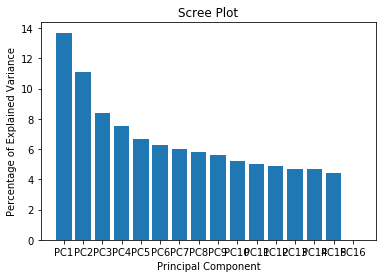

In [21]:
# plot the Scree plot with matplotlib
plt.bar(x=range(1, len(per_var)+1), height = per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title("Scree Plot")
plt.show()

In [22]:
#draw PCA plot  

pca_df = pd.DataFrame(pca_data, index = slice_column, columns = labels)
print(pca_df)



             PC1        PC2        PC3        PC4        PC5        PC6  \
CR9   -24.435761  41.346969  83.461546  43.040733  36.065640 -51.393322   
CR13  -29.648682 -79.786458  67.794407 -28.323271 -42.613628   1.907307   
CR14   68.400274  22.293941 -16.322094  -7.133144 -52.794896   7.137948   
CR16  123.739078  22.559905 -28.502384 -46.604970 -30.125350 -20.306448   
CY2   -72.468098  87.961712  13.921653 -16.764526 -28.625684  38.405003   
CY5    23.937919  84.999692  -5.877501 -28.962901  81.022747   2.380524   
CY10  -59.488224 -42.137614 -32.589633 -71.712465  38.324864  -9.302121   
CY15   16.331903 -19.213165  49.291968 -21.254147  12.281502  92.619830   
KR3   -71.198737  33.854088 -49.538270  47.641185 -47.567540 -14.890734   
KR4    -3.623375  38.927234  10.022998  -2.747943 -36.071071 -24.428185   
KR6    -3.482537 -34.294435  30.420698 -32.434548  -1.536732 -53.638392   
KR7    31.915944 -46.376667  -5.826904  32.398792  16.121841 -37.444415   
KY1   -10.222469 -14.6412

Index(['CR9', 'CR13', 'CR14', 'CR16', 'CY2', 'CY5', 'CY10', 'CY15', 'KR3',
       'KR4', 'KR6', 'KR7', 'KY1', 'KY6', 'KY11', 'KY12'],
      dtype='object')


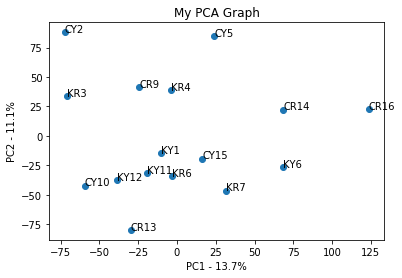

In [23]:
#scatter plot for PCA
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title("My PCA Graph")
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

print(pca_df.index)
# loop over annotate to add sample names to the graph 
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))

plt.show()

In [24]:
# look at loading scores for the x-axis (PC1)
loading_scores = pd.Series(pca.components_[0], index = genes)

#sort the absolute value of the scores from highest to lowest
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
#print(sorted_loading_scores)
#get the names of the top 10 indexes(ie gene names)
top_20_genes = sorted_loading_scores.head(20)

print(top_20_genes)

Gene
Max         0.018148
Ttll7       0.018091
Nalcn       0.017936
Ddx3x       0.017803
Epha5       0.017801
Ankrd28     0.017737
Rnf10       0.017649
Kcnk1       0.017584
Ier5        0.017537
Serinc2     0.017519
Cxcl14      0.017476
Tpm4        0.017389
Cish        0.017365
Rims4       0.017363
Camk1g      0.017294
Cryab       0.017259
Dnajb5      0.017254
Cacna2d1    0.017232
Tmem245     0.017230
Xbp1        0.017221
dtype: float64


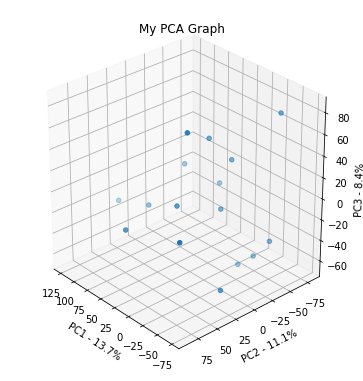

In [120]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition

fig = plt.figure(1, figsize=(5, 5))
plt.clf()
ax3d = Axes3D(fig, rect=[0, 0, .95, 1], elev=28, azim=138)


ax3d.scatter(pca_data[:,0],pca_data[:,1],pca_data[:,2], cmap=plt.cm.Spectral)


#print(pca_df.index)
# loop over annotate to add sample names to the graph 
#for sample in pca_df.index:
#    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))


#for i in range(len(m)): #plot each point + it's index as text above
# ax.scatter(m[i,0],m[i,1],m[i,2],color='b') 
# ax.text(m[i,0],m[i,1],m[i,2],  '%s' % (str(i)), size=20, zorder=1,  
# color='k') 
plt.title("My PCA Graph")
ax3d.set_xlabel('PC1 - {0}%'.format(per_var[0]))
ax3d.set_ylabel('PC2 - {0}%'.format(per_var[1]))
ax3d.set_zlabel('PC3 - {0}%'.format(per_var[2]))

plt.show()


In [128]:
print(pca_data[0:,0],pca_data[0:,1],pca_data[0:,2])

[-24.43576057 -29.64868175  68.40027431 123.73907813 -72.46809803
  23.93791935 -59.48822367  16.33190333 -71.19873676  -3.62337463
  -3.48253681  31.91594355 -10.22246876  68.33591215 -19.42660336
 -38.66654648] [ 41.34696876 -79.78645822  22.29394131  22.55990473  87.96171176
  84.9996916  -42.13761445 -19.21316491  33.85408825  38.92723394
 -34.29443487 -46.37666744 -14.64127642 -26.58684112 -31.70318234
 -37.20390057] [ 83.46154647  67.79440696 -16.32209419 -28.50238415  13.92165272
  -5.87750121 -32.58963267  49.29196812 -49.53826997  10.02299837
  30.42069752  -5.82690438  -8.14611881   8.18797366 -64.44398297
 -51.85435546]


Axes3D.scatter(xs, ys, zs=0, zdir='z', s=20, c=None, depthshade=True, *args, **kwargs)
Create a scatter plot.

Argument	Description

xs, ys	Positions of data points.

zs	Either an array of the same length as xs and ys or a single value to place all points in the same plane. Default is 0.

zdir	Which direction to use as z (‘x’, ‘y’ or ‘z’) when plotting a 2D set.

s	Size in points^2. It is a scalar or an array of the same length as x and y.

c	A color. c can be a single color format string, or a sequence of color specifications of length N, or a sequence of N numbers to be mapped to colors using the cmap and norm specified via kwargs (see below). Note that c should not be a single numeric RGB or RGBA sequence because that is indistinguishable from an array of values to be colormapped. 
c can be a 2-D array in which the rows are RGB or RGBA, however, including the case of a single row to specify the same color for all points.

depthshade	Whether or not to shade the scatter markers to give the appearance of depth. Default is True.


Keyword arguments are passed on to scatter().



Index(['CR9', 'CR13', 'CR14', 'CR16', 'CY2', 'CY5', 'CY10', 'CY15', 'KR3',
       'KR4', 'KR6', 'KR7', 'KY1', 'KY6', 'KY11', 'KY12'],
      dtype='object')


NameError: name 'm' is not defined

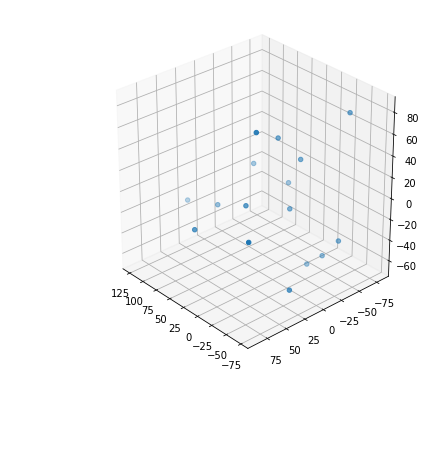

In [124]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition

fig = plt.figure(1, figsize=(5, 5))
plt.clf()
ax3d = Axes3D(fig, rect=[0, 0, .95, 1], elev=28, azim=138)


ax3d.scatter(pca_data[:,0],pca_data[:,1],pca_data[:,2], cmap=plt.cm.Spectral)


print(pca_df.index)
# loop over annotate to add sample names to the graph - not working?  need 3rd dimension?
for sample in pca_df.index:
   plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))

#copied this from the web as an example to label the points on a 3D plot - needs work!
for i in range(len(m)): #plot each point + it's index as text above
 ax3d.scatter(m[i,0],m[i,1],m[i,2],color='b') 
 ax3d.text(m[i,0],m[i,1],m[i,2],  '%s' % (str(i)), size=20, zorder=1,  
 color='k') 
plt.title("My PCA Graph")
ax3d.set_xlabel('PC1 - {0}%'.format(per_var[0]))
ax3d.set_ylabel('PC2 - {0}%'.format(per_var[1]))
ax3d.set_zlabel('PC3 - {0}%'.format(per_var[2]))

plt.show()

